
# SNARK : Modélisation Simple (R1CS vers QAP)
Dans ce notebook, nous explorons le processus de conversion d'une équation polynomiale en un système de contraintes R1CS (Rank 1 Constraint Systems) puis en un QAP (Quadratic Arithmetic Programs). 

L'exemple donné est celui où Bob souhaite prouver qu'il connaît un secret \( x \) tel que \( x^3+x+5 = 35 \). Nous allons décomposer cette équation, la modéliser sous forme de circuit arithmétique, puis la convertir en un système R1CS.


In [28]:
import zktool as zk
import numpy as np


## Entrée de l'équation
Veuillez entrer une équation polynomiale de type \( x^3 + x + 5 \). Nous allons ensuite la décomposer et la modéliser sous forme de circuit arithmétique.


In [29]:
eq_input=input("Enter the equation: de type x^3 + x + 5") #METTRE DES COEFFICIENTS >=0, aucune negatif pour l'instant


## Décomposition de l'équation et Modélisation des Circuits Arithmétiques
Une fois que nous avons l'équation, nous pouvons la décomposer en termes individuels et la représenter sous forme de circuit arithmétique. Le résultat ci-dessous montre cette représentation.


In [30]:
def transformer_equation(enonce):
    lignes = enonce.split('\n')
    lignes_nettoyees = [ligne.strip() for ligne in lignes if ligne.strip()]
    return lignes_nettoyees



#Les équations va etre automatique determiné avec votre input (Polynome)
# equations = zk.decompose_polynomial(eq_input)

#Voici une méthode rentrer les équations manuellements:

# Pour tester à la main il faut juste copier coller ses équations dans la variable manual_equation en dessus. Sinon laisser vide (manual_equation="").
manual_equation='''
v1 = x * x
v2 = x * v1
v3 = 3 * v2
v4 = 5 * v1
v5 = 10 * x
out = v3 + v4 + v5 + 3
'''

if manual_equation:
    equations=transformer_equation(manual_equation)

unique_words = zk.get_unique_words(equations)


print("Modelisation des circuits arithmetiques :")
for eq in equations:
    print(eq)

print("\nEnsemble des varibles =",unique_words)


Modelisation des circuits arithmetiques :
v1 = x * x
v2 = x * v1
v3 = 3 * v2
v4 = 5 * v1
v5 = 10 * x
out = v3 + v4 + v5 + 3

Ensemble des varibles = ['1', 'out', 'x', 'v1', 'v2', 'v3', 'v4', 'v5']



## Conversion du Circuit en R1CS
Le système R1CS (Rank 1 Constraint Systems) est une façon de représenter un ensemble de contraintes sous forme de matrices. Pour chaque équation du circuit, nous allons créer trois vecteurs associés (un pour chaque matrice A, B, C) qui représentent cette équation dans le système R1CS.


In [31]:
#création des 3 matrice vides A B C
L= []
R= []
O= []

print("Equations :")
for eq in equations:
    print(eq)
print(" ")

ref_array=list(unique_words)
print("Vecteur solution :")
print(ref_array)
print(' ')

print("Matrice L R O :")
for eq in equations:
    eq_split=eq.split()
    #print(eq_split)

    if eq_split[3]=='*':
        vecta=zk.get_position_vector(ref_array, eq_split[2])
        L.append(vecta)
        vectb=zk.get_position_vector(ref_array, eq_split[4])
        R.append(vectb)
        vectc=zk.get_position_vector(ref_array, eq_split[0])
        O.append(vectc)

    if eq_split[3]=='+':
        if "out" in eq:
            list_var = eq_split[2:]
        else:
            list_var = [eq_split[2],eq_split[4]]
        vecta=zk.get_position_vector(ref_array, list_var)
        L.append(vecta)
        vectb=zk.get_position_vector(ref_array, "1")
        R.append(vectb)
        vectc=zk.get_position_vector(ref_array, eq_split[0])
        O.append(vectc)

print("L=")
for ligne in L:
    print(ligne)
print(" ")

print("R=")
for ligne in R:
    print(ligne)
print(" ")

print("O=")
for ligne in O:
    print(ligne)
print(" ")

Equations :
v1 = x * x
v2 = x * v1
v3 = 3 * v2
v4 = 5 * v1
v5 = 10 * x
out = v3 + v4 + v5 + 3
 
Vecteur solution :
['1', 'out', 'x', 'v1', 'v2', 'v3', 'v4', 'v5']
 
Matrice L R O :
L=
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 1, 1, 1]
 
R=
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
 
O=
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0]
 


## Conversion R1CS en QAP

Graphiquement on peut aussi utiliser https://www.geogebra.org/calculator (ce qui est suffiant pour l'instant)
sinon un outils plus complexe : Maple


PolyW:

[[  0.      0.008   0.     -0.008   0.042  -0.083   0.083  -0.042]
 [  0.     -0.125   0.      0.167  -0.792   1.5    -1.417   0.667]
 [  0.      0.708   0.     -1.292   5.708 -10.083   8.917  -3.958]
 [  0.     -1.875   0.      4.833 -19.208  31.    -25.583  10.833]
 [  0.      2.283   0.     -8.7    29.25  -42.333  33.    -13.5  ]
 [  0.     -1.      0.      6.    -15.     20.    -15.      6.   ]]


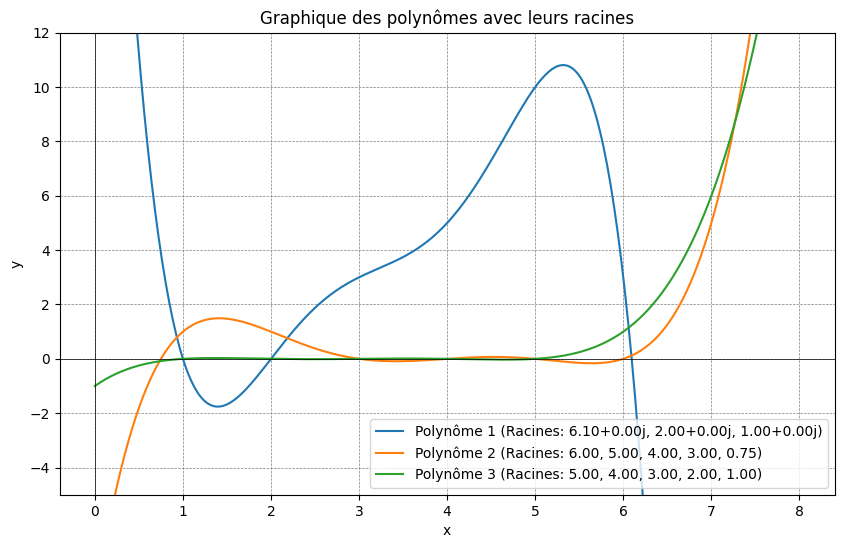

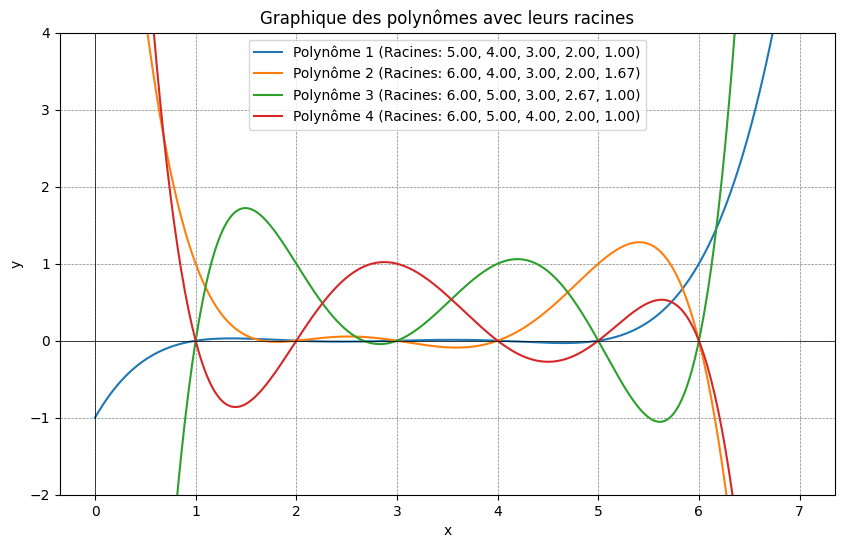

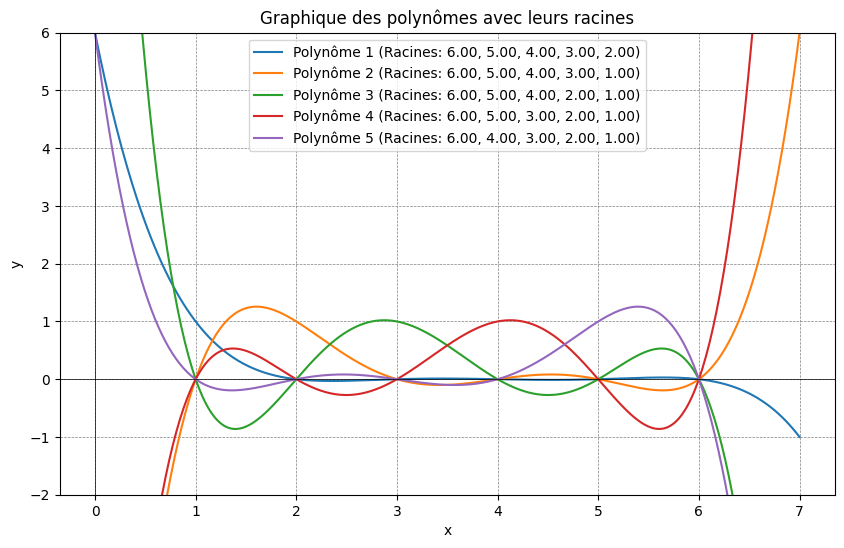

In [32]:
#Ici on cherche les coefficients des polynomes de chaque matrice

L=np.array(L)
R=np.array(R)
O=np.array(O)

# Convert matrices to their transpose for calculations
At, Bt, Ct = L.transpose(), R.transpose(), O.transpose()

# Calculate polynomial coefficient matrices
PolyL = zk.interpolate_and_get_coeff_matrix(At)
PolyR = zk.interpolate_and_get_coeff_matrix(Bt)
PolyO = zk.interpolate_and_get_coeff_matrix(Ct)


# Configuration de l'affichage
np.set_printoptions(precision=3, suppress=True)

def afficher_polynome(nom, poly):
    print(f"\n{nom}:\n")
    print(np.array(poly))


# Exemple d'utilisation
# print("-->", At)
# afficher_polynome("PolyU", np.transpose(PolyL))
# afficher_polynome("PolyV", np.transpose(PolyR))
afficher_polynome("PolyW", np.transpose(PolyO))


# afficher_polynome("PolyL(0)", [PolyL[0]])
# afficher_polynome("PolyL", [PolyL[7]])
zk.plot_polynomials([PolyL[0], PolyL[2], PolyL[7]], [0, 8],[-5, 12]) #zk.plot_polynomials(PolyL, [xmin, xmax],[ymin, ])

# afficher_polynome("PolyR", [PolyR[0]])
# afficher_polynome("PolyR", [PolyR[4]])
zk.plot_polynomials([PolyR[0], PolyR[2], PolyR[3], PolyR[4]], [0, 7],[-2, 4])

# afficher_polynome("PolyO", [PolyO[7]])
zk.plot_polynomials([PolyO[3], PolyO[4], PolyO[5], PolyO[6], PolyO[7]], [0, 7],[-2, 6])
# afficher_polynome("PolyO", PolyO)
# zk.plot_polynomials(PolyO, [0, 4],[-5, 5])


## Calcul de la preuve

In [33]:
values = {"x": 5}

S = zk.compute_solution_vector(ref_array, equations, values)
print("\nSolution Vector:", S)
print("\nVecteur avec variable ",ref_array)

v1 = 25
v2 = 125
v3 = 375
v4 = 125
v5 = 50
out = 553

Solution Vector: [1, 553, 5, 25, 125, 375, 125, 50]

Vecteur avec variable  ['1', 'out', 'x', 'v1', 'v2', 'v3', 'v4', 'v5']


-Imaginions si le prouver ne connait pas la solution, il va donner un x qui ne correspond pas à out. Ici x=3 donc la fonction zk.compute_solution_vector va forcement calculer la bonne sortie 35 => Solution Vector: [3, 1, 9, 35, 27, 30].

-Si on veut tester un prouver qui ne connait pas le solution on peux changer manuellement S = [3, 1, 9, **34**, 27, 30]. Maintenant il suffit d'aller voir la fin du programme pour voir si le verifier approuve ou non la preuve.

In [34]:
#Ici on chercher trouver le polynome T qui repond à tous les polynomes de la matrice A;B;C
result_LS = zk.polynomial_dot_product(PolyL, S)
result_RS = zk.polynomial_dot_product(PolyR, S)
result_OS = zk.polynomial_dot_product(PolyO, S)

print("U.w =", result_LS)
print("V.w =", result_RS)
print("W.w =", result_OS)

# Calcul de la convolution
convolution_product = np.convolve(result_LS, result_RS)

# Calcul de a = (Uw * Vw) - Ww
A = convolution_product - np.concatenate((np.zeros(len(convolution_product) - len(result_OS)), result_OS))
# print("A = ", A)

# print("racine de T =", np.roots(T))
# zk.plot_polynomials([T],[0,1])

# print("A.S =", result_LS)
# print("racine de AS =", np.roots(result_LS))
# zk.plot_polynomials([result_LS])

# print("B.S =", result_RS)
# print("racine de BS =", np.roots(result_RS))
# zk.plot_polynomials([result_RS])

# print("C.S =", result_OS)
# print("racine de CS =", np.roots(result_OS))
# zk.plot_polynomials([result_OS])



U.w = [    4.525   -68.167   388.542 -1035.333  1268.433  -553.   ]
V.w = [   -7.533   136.333  -920.333  2831.667 -3844.133  1809.   ]
W.w = [  -13.308   254.833 -1791.625  5651.667 -7723.567  3647.   ]


In [35]:
# T est le diviseur de A pour verifier s'il y a un reste ou non
print(len(equations))
T = zk.polynomial_coefficients(len(equations))
print("T = ", T)
print("A = ", A)

6
T =  [    1   -21   175  -735  1624 -1764   720]
A =  [     -34.088     1130.431   -16384.911   136320.039  -718713.804
  2500408.731 -5791667.006  8785347.6   -8320508.191  4428125.2
 -1004024.   ]


In [36]:
quotient,remainder=zk.polynomial_division(A, T)

# Imprimer le quotient
print(f"h = T / Z = {quotient}")
print(f"R = T % Z = {remainder}")
sum=0
for i in remainder:
    sum+=i
print("Somme des coefficients du reste =",sum)

# Vérifiez si le reste est nul
if not zk.is_remainder_close_to_zero(remainder, 1e-5):
    print("La preuve est refutée !")
else:
    print("La preuve est bonne")

h = T / Z = [  -34.088   414.576 -1713.366  2733.703 -1394.478]
R = T % Z = [ 0. -0.  0. -0.  0.]
Somme des coefficients du reste = 2.6193447411060333e-10
La preuve est bonne
